In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import data
data = pd.read_csv('/Users/hkromer/01_Projects/07_IoT_Paul/data/2019-12-29.data.csv', index_col=0)
data['time'] = pd.to_datetime(data['time'])
data.head()

In [ ]:
# store temperature and humidity separately
data_temp = data[['time', 'utc_time', 'temp']]
data_temp = data_temp[data_temp['temp'] > -100]

data_humid = data[['time', 'utc_time', 'humid']]
data_humid = data_humid[data_humid['humid'] > -100]

data_temp = data_temp.sort_values(by='time')
data_humid = data_humid.sort_values(by='time')

In [ ]:
# data_humid.set_index('time', inplace=True)
h_mean = data_humid['humid'].rolling(30).mean()
plt.plot(data_temp['time'].values,data_temp['temp'].values)
plt.plot(data_humid.index.values,data_humid['humid'].values)
plt.plot(h_mean.index.values,h_mean.values)
# plt.xlim("2019-12-10 09:00:00","2019-12-10 11:00:00")


In [106]:
def filter_data(delta, data, col):
    """
    Filters the dataset by keeping only those datapoints that deviate more than delta from the 
    previous one.
    Returns a pandas dataframe
    """
    data_return = pd.DataFrame()
    data_return['time'] = data['time'].copy()
    data_return['utc_time'] = data['utc_time'].copy()
    
    # copy temp or humid
    data_return[col] = data[col].copy()
    
    # shift by 1 and -1
    data_return[f'{col}_p1'] = data_return[col].shift(-1)
    
    # rolling mean. sampling frequency is around 10 seconds, to take rolling mean of 30 (5 min)
#     data_return[f'{col}_mean'] = data_return[col].rolling(30).mean()
    
    # create mask if the value is larger than the delta compared to the value before and after
    data_return['diff'] = np.abs(data_return[f'{col}_p1'] - data_return[col])
    
    data_return['mask'] =  (data_return['diff'] >= delta) 
    data_return = data_return[data_return['mask']]
    
    data_return = data_return[['utc_time','time',col]]
#     print(data_return.head(20))
    return data_return



((1583, 3), (170143, 3))

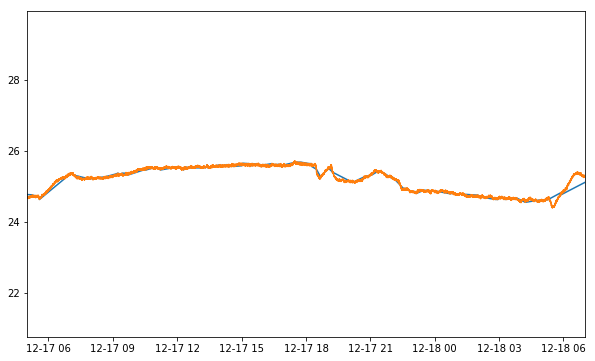

In [107]:
df = filter_data(0.05, data_temp, 'temp')
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(df['time'].values,df['temp'].values)
plt.plot(data_temp['time'].values,data_temp['temp'].values)

plt.xlim("2019-12-17 05:00:00","2019-12-18 07:00:00")
df.shape, data_temp.shape

In [ ]:
df = filter_data(0.1, data_humid, 'humid')

fig,ax = plt.subplots(figsize=(10,6))
plt.plot(df['time'].values,df['humid'].values)
plt.plot(data_humid['time'].values,data_humid['humid'].values)

# plt.xlim("2019-12-17 05:00:00","2019-12-18 07:00:00")
df.shape, data_humid.shape

In [108]:
df

,utc_time,time,temp
27,1575833151504,2019-12-08 19:25:51.504,25.219999
11,1575833311504,2019-12-08 19:28:31.504,25.219999
34,1575833678670,2019-12-08 19:34:38.670,25.219999
323,1575836631311,2019-12-08 20:23:51.311,25.270000
917,1575842510638,2019-12-08 22:01:50.638,25.020000
...,...,...,...
170639,1577633492825,2019-12-29 15:31:32.825,28.200001
170777,1577635062889,2019-12-29 15:57:42.889,27.930000
171016,1577637905602,2019-12-29 16:45:05.602,27.879999
171053,1577638043369,2019-12-29 16:47:23.369,27.930000
